In [13]:
import os
from glob import glob
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import plotting_extent
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [14]:
# Prepare the landsat bands to be stacked using glob and sort
landsat_bands_data_path = "./data564/*"
stack_band_paths = glob(landsat_bands_data_path)
stack_band_paths.sort()
stack_band_paths


['./data564\\LC08_L1TP_110035_20170410_20170414_01_T1_B5.tiff',
 './data564\\LC08_L1TP_110035_20170410_20170414_01_T1_B6.tiff',
 './data564\\LC08_L1TP_110035_20170410_20170414_01_T1_B7.tiff']

In [15]:
# Create output directory and the output path

output_dir = os.path.join("data564", "outputs")
if os.path.isdir(output_dir) == False:
    os.mkdir(output_dir)

raster_out_path = os.path.join(output_dir, "B564.tiff")

In [16]:
array, raster_prof = es.stack(stack_band_paths, out_path=raster_out_path)

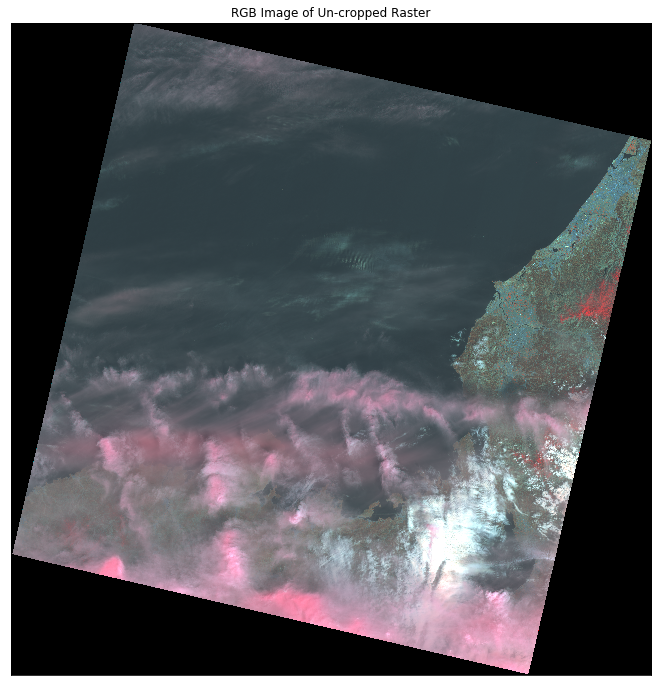

In [17]:
extent = plotting_extent(array[0], raster_prof["transform"])
fig, ax = plt.subplots(figsize=(12, 12))
ep.plot_rgb(
    array,
    ax=ax,
    stretch=True,
    extent=extent,
    str_clip=0.5,
    title="RGB Image of Un-cropped Raster",
)
plt.show()

In [19]:
#rasterioでgeotifを読み込みタグにメタデータに
B564 = rio.open("./data564/outputs/B564.tiff")
B564.meta


{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 7671,
 'height': 7811,
 'count': 3,
 'crs': CRS.from_dict(init='epsg:32653'),
 'transform': Affine(30.0, 0.0, 427785.0,
        0.0, -30.0, 4105515.0)}

In [25]:
import numpy as np
np.max(array)

65535

In [26]:
array.shape

(3, 7811, 7671)

In [20]:
"""A dataset’s transform is an affine transformation matrix that maps pixel locations in (row, col) 
coordinates to (x, y) spatial positions. The product of this matrix and (0, 0), the row and column 
coordinates of the upper left corner of the dataset, is the spatial position of the upper left corner"""

B564.transform * (0, 0)

(427785.0, 4105515.0)

In [37]:
#to get pixel value of upper left corner

x, y = (B564.bounds.left, B564.bounds.top)
row, col = B564.index(x, y)
row,col



(0, 0)

In [38]:
#easting 399839.9 northing 3916174.4
#to get pixel value of biwako A??ここわからん
a, b= (B564.bounds.left, B564.bounds.top - 189371.6)
row, col = B564.index(a, b)
row,col


(6312, 0)

In [41]:
#解像度
B564.res

(30.0, 30.0)

In [32]:
from osgeo import gdal, osr

ds = gdal.Open("./data564/outputs/B564.tiff")
ds.GetGeoTransform()


(427785.0, 30.0, 0.0, 4105515.0, 0.0, -30.0)

In [37]:
gdalinfo ~/data564/outputs/B564.tif

SyntaxError: invalid syntax (<ipython-input-37-6c1b57209d11>, line 1)